In [ ]:
import sys
import os
import numpy as np


# sys.path.insert(
#     0,
#     os.path.abspath(os.path.join(os.path.dirname(__file__), "../..")),
# )
sys.path.insert(0, "..")

from settings import *


from fermiqp.lattice import *

import matplotlib as mpl

mpl.rcParams["axes.grid"] = True
mpl.rcParams["lines.marker"] = ""

%load_ext autoreload
%autoreload 2

# A Gaussian Beam

Circular beam propagaint along the z-axis

In [2]:
circular_beam = GaussianBeam3D(
    waist=100e-6,
    focuspos=[0, 0, 0],
    wavelen=1064e-9,
    prop_dir=[0, 0, 1],
    polar_dir=[1, 0, 0],
    phi=0,
    power=1,  # W
)

In [3]:
circular_beam.__dict__

{'waist': 0.0001,
 'wavelen': 1.064e-06,
 'k': 5905249.348852994,
 'focuspos': [0, 0, 0],
 'x0': 0,
 'y0': 0,
 'z0': 0,
 'zR': 0.029526246744264968,
 'prop_dir': array([0., 0., 1.]),
 'polar_dir': array([1., 0., 0.]),
 'phi': 0,
 'depth': -80218.69777278182,
 'power': 1}

In [4]:
circular_beam.power

1

Get the waist along x and y at different z

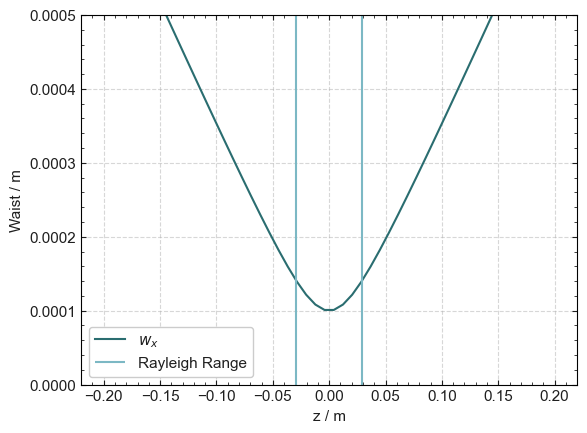

In [5]:
z = np.linspace(-0.2, 0.2)
waists = circular_beam.getWaist(z)
plt.plot(z, waists, label="$w_x$")
# plt.plot(z, waists[1], label="$w_y$")
plt.ylabel("Waist / m")
plt.xlabel("z / m")
plt.ylim(0, 500e-6)
plt.vlines(
    [circular_beam.zR, -circular_beam.zR], 0, 0.0005, label="Rayleigh Range", color="C2"
)
plt.legend()

c:\Users\janet\ownCloud - Janet Qesja (jqesja)@datashare.mpcdf.mpg.de\phd_code\fermiqp_physics\fermiqp-physics\examples\..\lattice\opticallattice.py:527: UserWarning: E-field calculation doesn't account for power
  warnings.warn("E-field calculation doesn't account for power")
c:\Users\janet\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\janet\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Electric Field / a.u.')

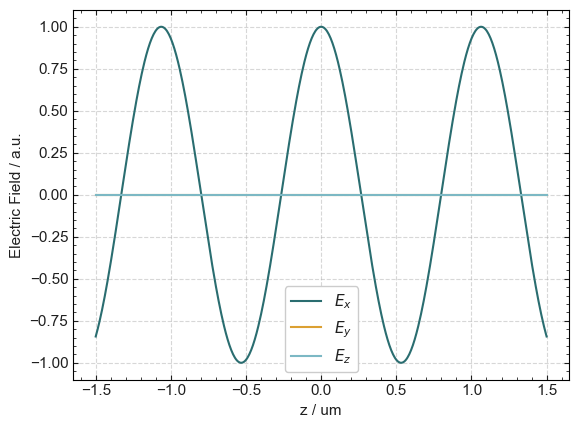

In [6]:
z = np.linspace(-1.5, 1.5, 500) * 1e-6
Z, _ = np.meshgrid(z, z)
E_field = circular_beam.getVectorField([0, 0, Z])
plt.plot(z / 1e-6, E_field[0][50, :], label="$E_x$")
plt.plot(z / 1e-6, E_field[1][50, :], label="$E_y$")
plt.plot(z / 1e-6, E_field[2][50, :], label="$E_z$")
plt.legend()
plt.xlabel("z / um")
plt.ylabel("Electric Field / a.u.")

In [7]:
x = np.linspace(-300, 300, 500) * 1e-6
z = np.linspace(-200, 200, 500) * 1e-6
X, Z = np.meshgrid(x, z)
E_field = circular_beam.getVectorField([X, 0, Z])

Text(0, 0.5, 'Electric Field / a.u.')

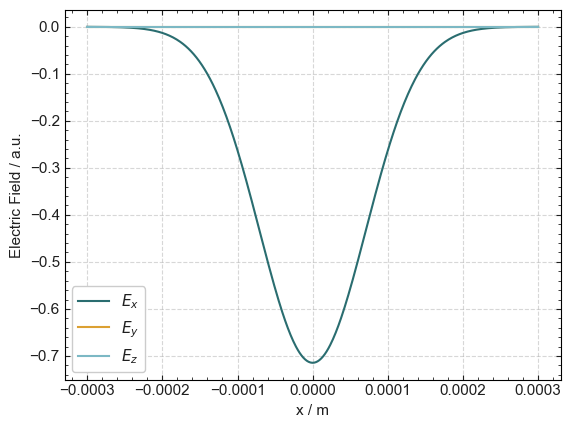

In [8]:
plt.plot(x, np.real(E_field[0][E_field.shape[1] // 2, :]), label="$E_x$")
plt.plot(x, np.real(E_field[1][E_field.shape[1] // 2, :]), label="$E_y$")
plt.plot(x, np.real(E_field[2][E_field.shape[1] // 2, :]), label="$E_z$")
plt.legend()
plt.xlabel("x / m")
plt.ylabel("Electric Field / a.u.")

Text(0, 0.5, 'z / m')

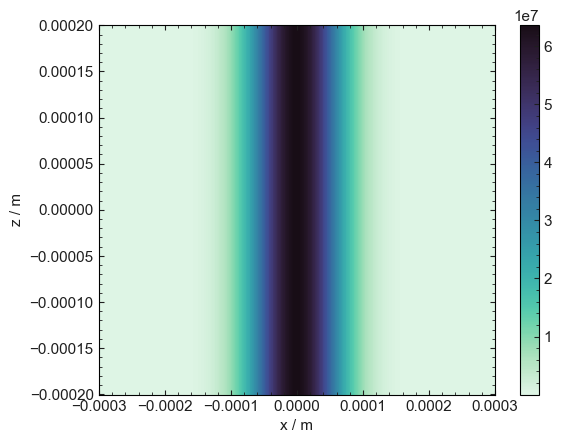

In [9]:
beam_intentsity = circular_beam.getIntensity([X, 0, Z])
plt.pcolor(X, Z, beam_intentsity)
plt.colorbar()
plt.grid()
plt.xlabel("x / m")
plt.ylabel("z / m")

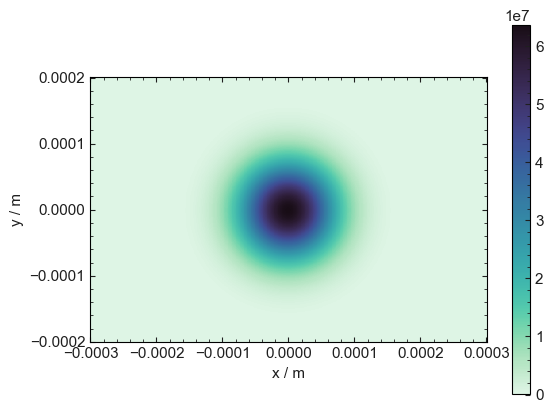

In [10]:
X, Y = np.meshgrid(x, z)
beam_intentsity = circular_beam.getIntensity([X, Y, 0])
plt.pcolor(X, Z, beam_intentsity)
plt.colorbar()
plt.grid()
plt.xlabel("x / m")
plt.ylabel("y / m")
plt.gca().set_aspect("equal")

Text(0, 0.5, 'Intensity / W $m^{-2}$.')

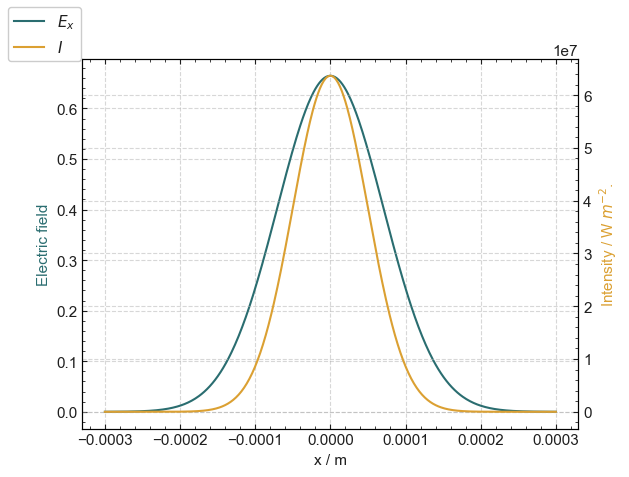

In [11]:
plt.plot(x, np.real(E_field[0][25, :]), label="$E_x$")
plt.xlabel("x / m")
plt.ylabel("Electric field", color="C0")

plt.twinx()
plt.plot(x, np.real(beam_intentsity[Y.shape[0] // 2, :]), label="$I$", color="C1")
# plt.plot(x, lol[Y.shape[0]//2,:], label="$I$", color="C2")
plt.gcf().legend(loc=2)
plt.ylabel("Intensity / W $m^{-2}$.", color="C1")

# Interfering beams: y-SL

In [12]:
def angle_to_vec(theta: float, phi: float = 90) -> np.ndarray:
    """
    returns a unitary vector with the specified angle wrt x-axis
    theta:  in deg,
    phi:    in deg, angle to the lattice direction
    """
    [theta, phi] = np.deg2rad([theta, phi])

    vec = np.array(
        [
            np.cos(theta) * np.sin(phi),
            np.sin(theta) * np.sin(phi),
            np.cos(phi),
        ]
    )
    return vec / np.linalg.norm(vec)

In [13]:
prop_dir1 = angle_to_vec(14, 90)
prop_dir2 = angle_to_vec(-14, 90)


Vl = 1
Vs = 1


phi_l = 0  # pi / 8
phi_s = pi / 2

s_a = 1.1e-6
a_l = dw_size = s_a * 2


green_waist = 150e-6  # 100e-6
ir_waist = 120e-6  # green_waist# * np.sqrt(2)

phi_l = 0  # pi / 8
phi_s = 0


gr = GaussianBeam3D(
    waist=green_waist,
    wavelen=532e-9,
    prop_dir=prop_dir1,
    depth=Vs,
    phi=phi_s,
)
gr2 = GaussianBeam3D(
    waist=green_waist,
    wavelen=532e-9,
    prop_dir=prop_dir2,
    depth=Vs,
    phi=0,
)
ir = GaussianBeam3D(
    waist=ir_waist,
    wavelen=1064e-9,
    prop_dir=prop_dir1,
    depth=Vl,
    phi=phi_l,
)
ir2 = GaussianBeam3D(
    waist=ir_waist,
    wavelen=1064e-9,
    prop_dir=prop_dir2,
    depth=Vl,
    phi=0,  # phi_l,
)

green_beams = [gr, gr2]
ir_beams = [ir, ir2]

green_latt = InterferingBeams(green_beams)
ir_latt = InterferingBeams(ir_beams)

In [14]:
y = np.linspace(-2.2, 2.2, 501) * 1e-6
x = y


X, Y = np.meshgrid(x, y)
green_intensity = green_latt.getIntensity([X, Y, 0])
ir_intensity = ir_latt.getIntensity([X, Y, 0])

778.3134639518977
778.3134639518977
793.605219285405
793.605219285405


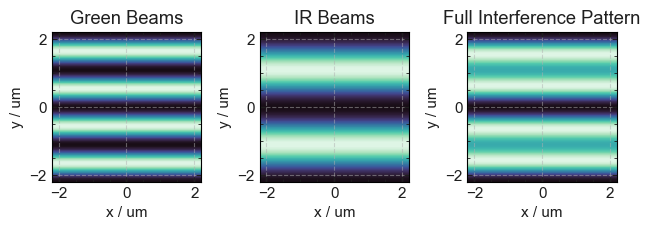

In [15]:
fig, axs = plt.subplots(1, 3)
axs[0].set_title("Green Beams")
axs[0].pcolor(X / 1e-6, Y / 1e-6, green_intensity)
axs[1].pcolor(X / 1e-6, Y / 1e-6, ir_intensity)
axs[1].set_title("IR Beams")
axs[2].pcolor(X / 1e-6, Y / 1e-6, green_intensity + ir_intensity)
axs[2].set_title("Full Interference Pattern")


for ax in axs:
    ax.set_xlabel("x / um")
    ax.set_ylabel("y / um")
    ax.set_aspect("equal")
fig.tight_layout()

NOTE: there is no time averaging when interfering beams with different wavelength

In [16]:
different_beams = InterferingBeams([gr, gr2, ir, ir2])
wrong_pattern = InterferingBeams(green_beams + ir_beams).getIntensity([X, Y, 0])

778.3134639518977
778.3134639518977
793.605219285405
793.605219285405


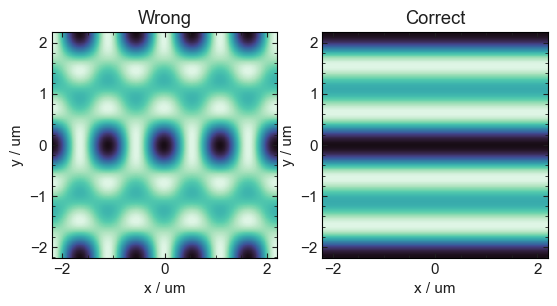

In [17]:
plt.subplot(121)
plt.pcolor(X / 1e-6, Y / 1e-6, wrong_pattern)
plt.title("Wrong")
plt.xlabel("x / um")
plt.ylabel("y / um")
plt.grid()
plt.gca().set_aspect("equal")


plt.subplot(122)
plt.title("Correct")
plt.pcolor(X / 1e-6, Y / 1e-6, green_intensity + ir_intensity)
plt.xlabel("x / um")
plt.ylabel("y / um")
plt.grid()
plt.gca().set_aspect("equal")

In the above figure, the intensity patter along x appears on the right due running interference of the pairs of copropagating beams, which would average out in our timescales

## The potential

Keep in mind that an intensity pattern is not a potential.

The polarizability needs to be accounted for.

For us, the polarizability of Li at 532 nm and 1064 nm is almost equal and opposite.
To a first approximation, the difference of the intensities represents the potential on the atoms.

In [18]:
prop_dir1 = angle_to_vec(14, 90)
prop_dir2 = angle_to_vec(-14, 90)


Vl = 100e3
Vs = 100e3

green_waist = 150e-6  # 100e-6
ir_waist = 120e-6  # green_waist# * np.sqrt(2)

phi_l = 0  # pi / 8
phi_s = 0


gr = GaussianBeam3D(
    waist=green_waist,
    wavelen=532e-9,
    prop_dir=prop_dir1,
    depth=Vs,
    phi=phi_s,
)
gr2 = GaussianBeam3D(
    waist=green_waist,
    wavelen=532e-9,
    prop_dir=prop_dir2,
    depth=Vs,
    phi=0,
)
ir = GaussianBeam3D(
    waist=ir_waist,
    wavelen=1064e-9,
    prop_dir=prop_dir1,
    depth=Vl,
    phi=phi_l,
)
ir2 = GaussianBeam3D(
    waist=ir_waist,
    wavelen=1064e-9,
    prop_dir=prop_dir2,
    depth=Vl,
    phi=0,  # phi_l,
)

green_beams = [gr, gr2]
ir_beams = [ir, ir2]

green_latt = InterferingBeams(green_beams)
ir_latt = InterferingBeams(ir_beams)


y = np.linspace(-2.2, 2.2, 501) * 1e-6
x = y

X, Y = np.meshgrid(x, y)
green_intensity = green_latt.getIntensity([X, Y, 0])
ir_intensity = ir_latt.getIntensity([X, Y, 0])

77831346.39518978
77831346.39518978
79360521.92854051
79360521.92854051


In [19]:
potential = green_intensity / green_intensity.max() - ir_intensity / ir_intensity.max()

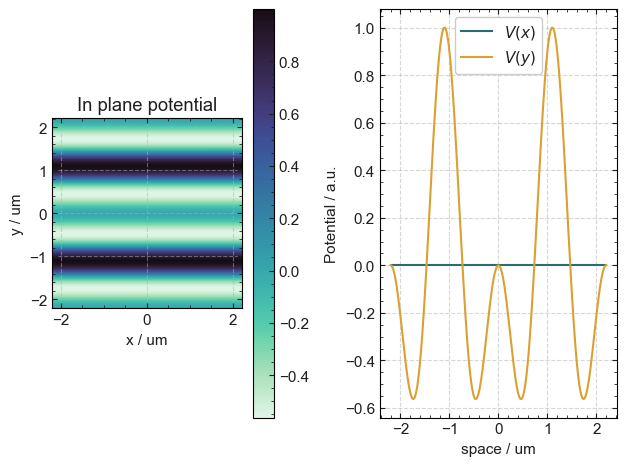

In [20]:
plt.subplot(121)

plt.pcolor(X / 1e-6, Y / 1e-6, potential)
plt.title("In plane potential")
plt.xlabel("x / um")
plt.ylabel("y / um")
plt.gca().set_aspect("equal")
plt.colorbar()


plt.subplot(122)
plt.plot(
    x / 1e-6,
    potential[potential.shape[0] // 2, :],
    label="$V(x)$",
)
plt.plot(
    y / 1e-6,
    potential[:, potential.shape[1] // 2],
    label="$V(y)$",
)
plt.legend()
plt.xlabel("space / um")
plt.ylabel("Potential / a.u.")


plt.tight_layout()

## Phase shifting

Note: Since $V\propto I\propto |E^2|$, there is a factor two between the absolute phase of a beam, and the absolute phase of the potential.



$\varphi^E = \frac{1}{2} \varphi^V$

$\varphi_{rel} = \varphi_l -2\varphi_s$

### Shifting the green

77831346.39518978
77831346.39518978
79360521.92854051
79360521.92854051
77831346.39518978
77831346.39518978
77831346.39518978
77831346.39518978
77831346.39518978
77831346.39518978
77831346.39518978
77831346.39518978
77831346.39518978
77831346.39518978
77831346.39518978
77831346.39518978
77831346.39518978
77831346.39518978
77831346.39518978
77831346.39518978
77831346.39518978
77831346.39518978


Text(0.5, 1.0, 'Shift phase of the green beam')

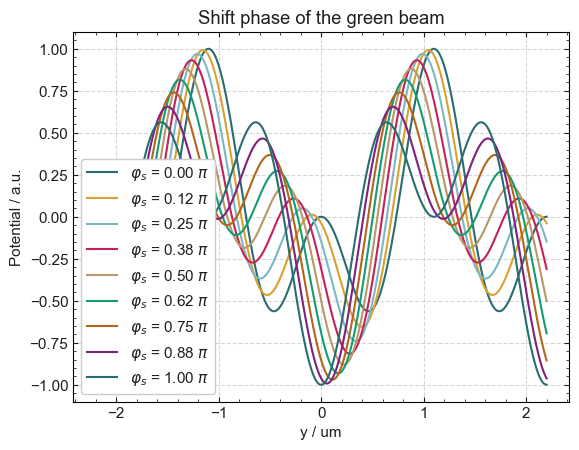

In [21]:
gr.phi = 0
gr2.phi = 0
green_beams = [gr, gr2]
green_latt = InterferingBeams(green_beams)
green_intensity = green_latt.getIntensity([X, Y, 0])

ir.phi = 0
ir2.phi = 0
ir_beams = [ir, ir2]
ir_latt = InterferingBeams(ir_beams)
ir_intensity = ir_latt.getIntensity([X, Y, 0])
potential = green_intensity / green_intensity.max() - ir_intensity / ir_intensity.max()

for phi in np.linspace(0, 1, 9, endpoint=True) * pi:
    gr.phi = phi
    green_beams = [gr, gr2]
    green_latt = InterferingBeams(green_beams)
    green_intensity = green_latt.getIntensity([X, Y, 0])
    potential = (
        green_intensity / green_intensity.max() - ir_intensity / ir_intensity.max()
    )
    plt.plot(
        y / 1e-6,
        potential[:, potential.shape[1] // 2],
        label=f"$\\varphi_s$ = {phi/pi:.2f} $\\pi$",
    )
plt.legend()
plt.xlabel("y / um")
plt.ylabel("Potential / a.u.")

plt.title("Shift phase of the green beam")

We need a range oƒ $1\pi$ on the electric field phase of the green light to gain a shift of  $\pi/2$ on the short potential

77831346.39518978
77831346.39518978
79360521.92854051
79360521.92854051
79360521.92854051
79360521.92854051
79360521.92854051
79360521.92854051
79360521.92854051
79360521.92854051
79360521.92854051
79360521.92854051
79360521.92854051
79360521.92854051
79360521.92854051
79360521.92854051
79360521.92854051
79360521.92854051
79360521.92854051
79360521.92854051
79360521.92854051
79360521.92854051


Text(0.5, 1.0, 'Shift IR Phase')

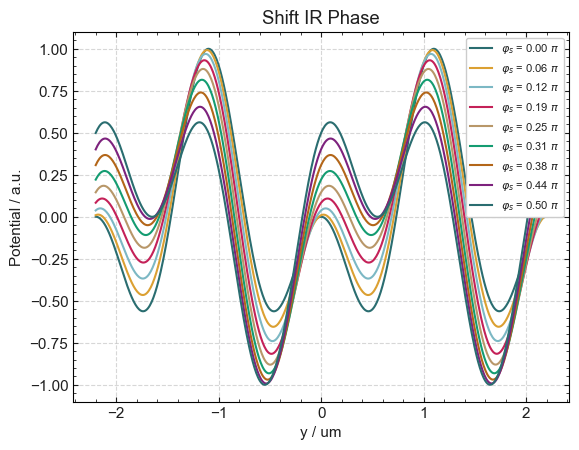

In [22]:
gr.phi = 0
gr2.phi = 0
green_beams = [gr, gr2]
green_latt = InterferingBeams(green_beams)
green_intensity = green_latt.getIntensity([X, Y, 0])

ir.phi = 0
ir2.phi = 0
ir_beams = [ir, ir2]
ir_latt = InterferingBeams(ir_beams)
ir_intensity = ir_latt.getIntensity([X, Y, 0])
potential = green_intensity / green_intensity.max() - ir_intensity / ir_intensity.max()


for phi in np.linspace(0, 0.5, 9) * pi:
    ir.phi = phi
    ir_beams = [ir, ir2]
    ir_latt = InterferingBeams(ir_beams)
    ir_intensity = ir_latt.getIntensity([X, Y, 0])
    potential = (
        green_intensity / green_intensity.max() - ir_intensity / ir_intensity.max()
    )
    plt.plot(
        y / 1e-6,
        potential[:, potential.shape[1] // 2],
        label=f"$\\varphi_s$ = {phi/pi:.2f} $\\pi$",
    )
plt.legend(fontsize=8)
plt.xlabel("y / um")
plt.ylabel("Potential / a.u.")


plt.title("Shift IR Phase")

We need a range oƒ $\frac{\pi}{2}$ on the electric field phase of the IR
 light to gain a shift of  $\pi/4$ on the short potential

# Elliptical Beam

## Propagating along z

In [23]:
elbeam = EllipticalGaussianBeam(
    # waistx=400e-6,
    waistx=500e-6,
    waisty=1e-3,
    polar_dir=[0, 1, 0],
    prop_dir=[0, 0, 1],
    power=1,
    wx_axis=[1, 0, 0],
)

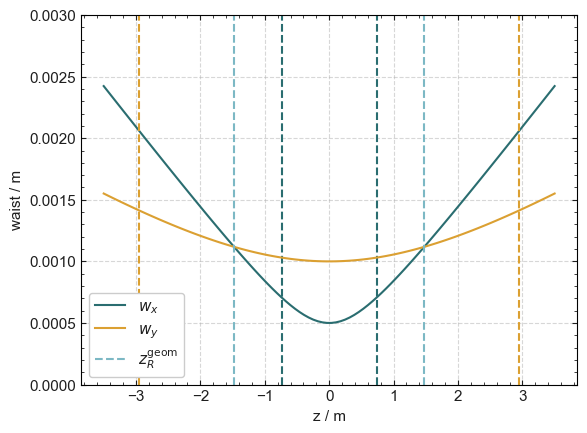

In [24]:
z = np.linspace(-3.5, 3.5, 100)
wx, wy = elbeam.getWaist(z)
plt.plot(
    z,
    wx,
    label="$w_x$",
)
plt.vlines([elbeam.zRx, -elbeam.zRx], 0, 0.003, linestyles="--")
plt.plot(
    z,
    wy,
    label="$w_y$",
)
plt.vlines([elbeam.zRy, -elbeam.zRy], 0, 0.003, color="C1", linestyles="--")
plt.ylim(0, 0.003)

plt.vlines(
    [elbeam.zR, -elbeam.zR],
    0,
    0.003,
    color="C2",
    linestyles="--",
    label="$z_R^\\text{geom}$",
)
plt.xlabel("z / m")
plt.ylabel("waist / m")

plt.legend()

Get Scalar Gaussian distribution along z (prop dir)

Text(0, 0.5, 'Electric Field / a.u.')

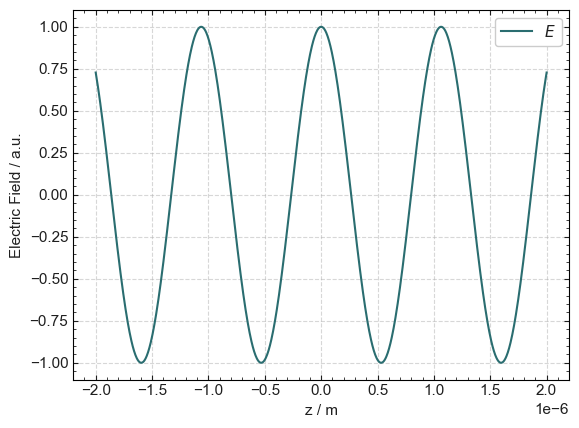

In [25]:
z = np.linspace(-2, 2, 1000) * 1e-6
# y = np.linspace(-300, 300, 1000) * 1e-6
Z, _ = np.meshgrid(z, 0)

elfield = elbeam.getScalarField([0, 0, Z])

plt.plot(z, np.real(elfield[0]), label="$E$")

plt.legend()
plt.xlabel("z / m")
plt.ylabel("Electric Field / a.u.")

Text(0, 0.5, 'Electric Field / a.u.')

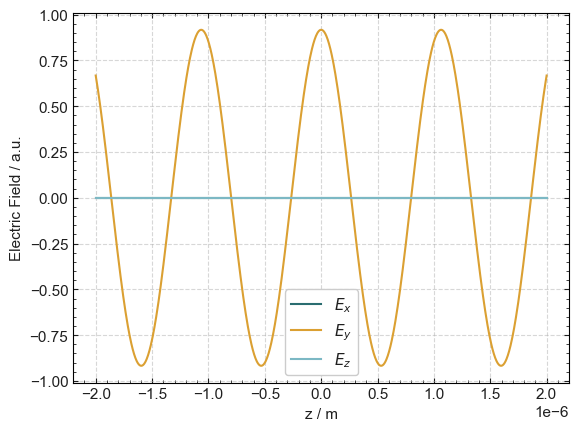

In [26]:
z = np.linspace(-2, 2, 1000) * 1e-6
y = np.linspace(-300, 300, 100) * 1e-6
Z, Y = np.meshgrid(z, y)

# elfield = elbeam.getScalarField([0, 0, z])
elfield = elbeam.getVectorField([0, Y, Z])
# print(elfield)

plt.plot(z, np.real(elfield[0][elfield.shape[0] // 2, :]), label="$E_x$")
plt.plot(z, np.real(elfield[1][elfield.shape[0] // 2, :]), label="$E_y$")
plt.plot(z, np.real(elfield[2][elfield.shape[0] // 2, :]), label="$E_z$")
plt.legend()
plt.xlabel("z / m")
plt.ylabel("Electric Field / a.u.")

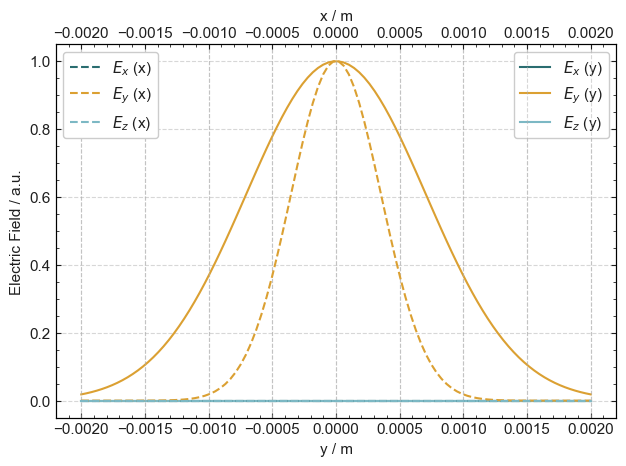

In [27]:
# x = np.linspace(-300, 300, 500) * 1e-5
# y = np.linspace(-300, 300, 500) * 1e-5
x = np.linspace(-2, 2, 100) * 1e-3
y = np.linspace(-2, 2, 100) * 1e-3
X, Y = np.meshgrid(x, y)

elfield = elbeam.getVectorField([X, Y, 0])
plt.plot(y, elfield[0][:, elfield.shape[2] // 2], label="$E_x$ (y)")
plt.plot(y, elfield[1][:, elfield.shape[2] // 2], label="$E_y$ (y)")
plt.plot(y, elfield[2][:, elfield.shape[2] // 2], label="$E_z$ (y)")
plt.legend()
plt.xlabel("y / m")
plt.ylabel("Electric Field / a.u.")

plt.twiny()
plt.plot(x, elfield[0][elfield.shape[1] // 2, :], label="$E_x$ (x)", linestyle="--")
plt.plot(x, elfield[1][elfield.shape[1] // 2, :], label="$E_y$ (x)", linestyle="--")
plt.plot(x, elfield[2][elfield.shape[1] // 2, :], label="$E_z$ (x)", linestyle="--")
plt.legend(loc=2)
plt.xlabel("x / m")
plt.tight_layout()

In [28]:
x = np.linspace(-1.5, 1.5, 500) * 1e-3
y = np.linspace(-1.5, 1.5, 500) * 1e-3
X, Y = np.meshgrid(x, y)
elfield = elbeam.getVectorField([X, Y, 0])
el_intensity = elbeam.getIntensity([X, Y, 0])

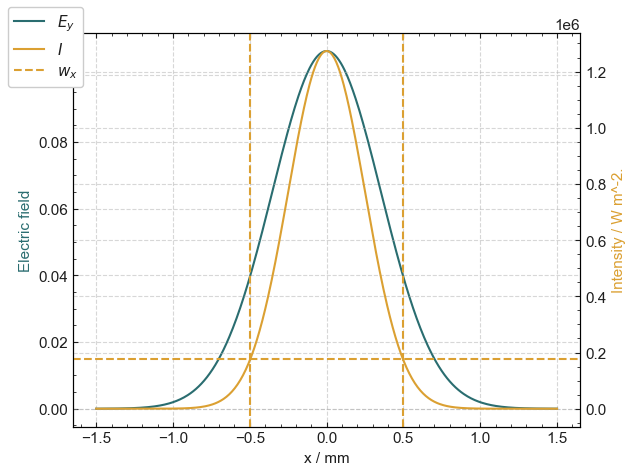

In [29]:
plt.plot(
    x / 1e-3,
    elfield[1][elfield.shape[0] // 2, :],
    label="$E_y$",
)
plt.xlabel("x / mm")
plt.ylabel("Electric field", color="C0")

plt.twinx()
plt.plot(x / 1e-3, el_intensity[Y.shape[0] // 2, :], label="$I$", color="C1")


plt.axhline(el_intensity.max() / 2.67**2, linestyle="--", color="C1")
plt.axvline(elbeam.waistx / 1e-3, linestyle="--", color="C1", label="$w_x$")
plt.axvline(-elbeam.waistx / 1e-3, linestyle="--", color="C1")

plt.gcf().legend(loc=2)

plt.ylabel("Intensity / W m^-2.", color="C1")
plt.tight_layout()

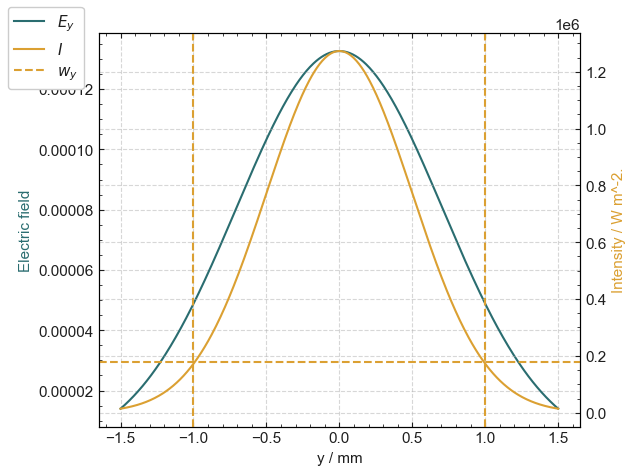

In [30]:
plt.plot(
    y / 1e-3,
    elfield[1][:, elfield.shape[0] // 2],
    label="$E_y$",
)
plt.xlabel("y / mm")
plt.ylabel("Electric field", color="C0")

plt.twinx()
# plt.plot(x / 1e-3, np.real(el_intensity[Y.shape[0] // 2, :]), label="$I$", color="C1")
plt.plot(x / 1e-3, el_intensity[:, Y.shape[0] // 2], label="$I$", color="C1")

plt.axhline(el_intensity.max() / 2.67**2, linestyle="--", color="C1")
plt.axvline(elbeam.waisty / 1e-3, linestyle="--", color="C1", label="$w_y$")
plt.axvline(-elbeam.waisty / 1e-3, linestyle="--", color="C1")


# plt.plot(
#     z,
#     np.real(beam_intentsity[:, beam_intentsity.shape[1] // 2]),
#     label="$I$",
#     color="C2",
# )
# plt.plot(x, lol[Y.shape[0]//2,:], label="$I$", color="C2")
plt.gcf().legend(loc=2)

plt.ylabel("Intensity / W m^-2.", color="C1")
plt.tight_layout()

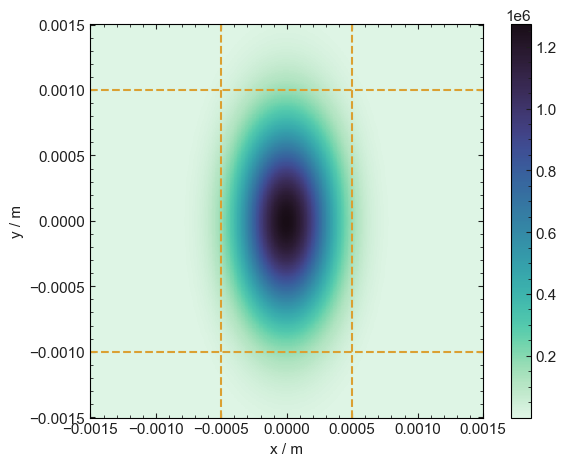

In [31]:
plt.pcolor(X, Y, el_intensity)
plt.axvline(elbeam.waistx, linestyle="--", color="C1", label="$w_x$")
plt.axvline(-elbeam.waistx, linestyle="--", color="C1")
plt.axhline(elbeam.waisty, linestyle="--", color="C1", label="$w_y$")
plt.axhline(-elbeam.waisty, linestyle="--", color="C1")
plt.colorbar()
plt.grid()
plt.xlabel("x / m")
plt.ylabel("y / m")
plt.gca().set_aspect("equal")
plt.tight_layout()

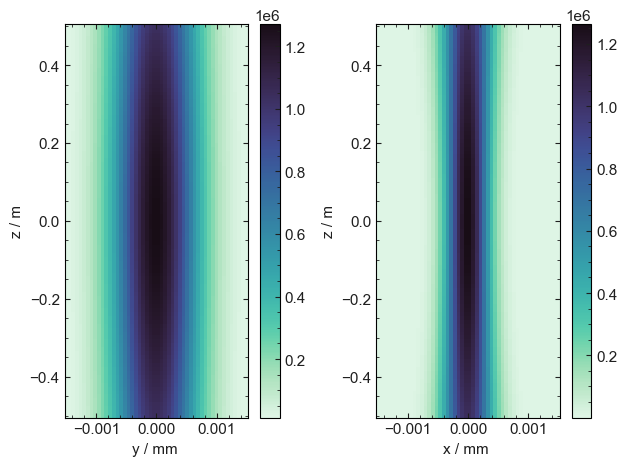

In [32]:
plt.subplot(121)
y = np.linspace(-1.5, 1.5, 50) * 1e-3
z = np.linspace(-0.5, 0.5, 100)
Y, Z = np.meshgrid(y, z)
el_intensity = elbeam.getIntensity([0, Y, Z])
plt.pcolor(Y, Z, el_intensity)
plt.colorbar()
plt.grid()
plt.xlabel("y / mm ")
plt.ylabel("z / m")
# plt.gca().set_aspect("equal")
plt.subplot(122, sharey=plt.gca())
# x = np.linspace(-3, 3, 50) * 1e-3
x = y
# z = np.linspace(-0.1, 0.1, 50)
X, Z = np.meshgrid(y, z)
el_intensity = elbeam.getIntensity([X, 0, Z])
plt.pcolor(X, Z, el_intensity)
plt.colorbar()
plt.grid()
plt.xlabel("x / mm ")
plt.ylabel("z / m")
# plt.gca().set_aspect("equal")
plt.tight_layout()

## Rotated on XY plane

In [33]:
elbeam = EllipticalGaussianBeam(
    waistx=400e-6,
    waisty=1e-3,
    polar_dir=[0, 1, 0],
    prop_dir=[0, 0, 1],
    power=1,
    # angle=pi / 3,
    wx_axis=[1 / 2, 1 / 2, 0],
)

The `.getWaist()` method computes the waists along the minor and major axis

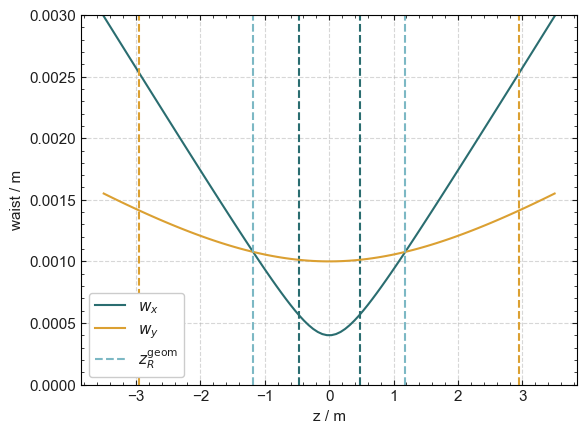

In [34]:
z = np.linspace(-3.5, 3.5, 100)
wx, wy = elbeam.getWaist(z)
plt.plot(
    z,
    wx,
    label="$w_x$",
)
plt.vlines([elbeam.zRx, -elbeam.zRx], 0, 0.003, linestyles="--")
plt.plot(
    z,
    wy,
    label="$w_y$",
)
plt.vlines([elbeam.zRy, -elbeam.zRy], 0, 0.003, color="C1", linestyles="--")
plt.ylim(0, 0.003)

plt.vlines(
    [elbeam.zR, -elbeam.zR],
    0,
    0.003,
    color="C2",
    linestyles="--",
    label="$z_R^\\text{geom}$",
)
plt.xlabel("z / m")
plt.ylabel("waist / m")

plt.legend()

The `getIntensity()` methods is sensitive to the angle between the major and minor axis and the reference frame

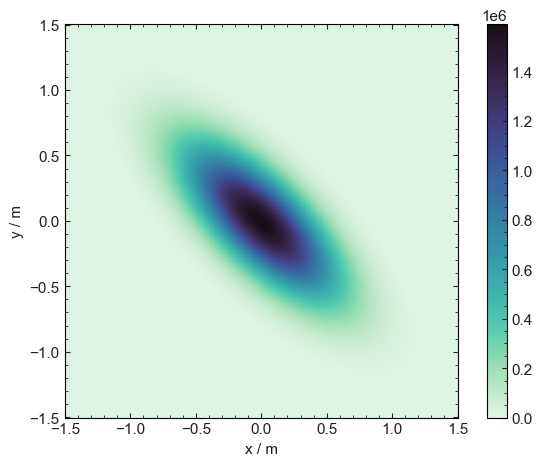

In [35]:
x = np.linspace(-1.5, 1.5, 500) * 1e-3
y = np.linspace(-1.5, 1.5, 500) * 1e-3
X, Y = np.meshgrid(x, y)

el_intensity = elbeam.getIntensity([X, Y, 0])
plt.pcolor(X / 1e-3, Y / 1e-3, el_intensity)
plt.colorbar()
plt.grid()
plt.xlabel("x / m")
plt.ylabel("y / m")
plt.gca().set_aspect("equal")
plt.tight_layout()

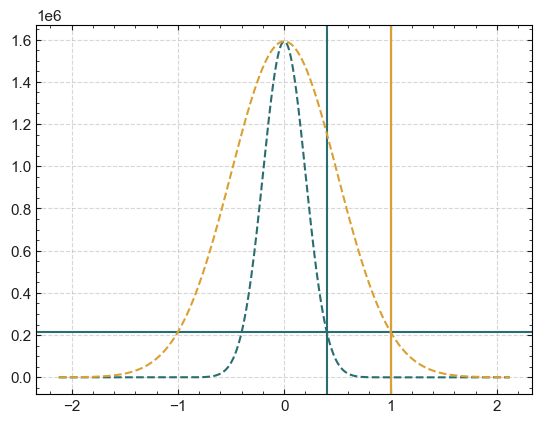

In [36]:
x = np.linspace(-1.5, 1.5, 500) * 1e-3
y = np.linspace(-1.5, 1.5, 500) * 1e-3
X, Y = np.meshgrid(x, y)
el_int = elbeam.getIntensity([X, Y, 0])

plt.axhline(np.nanmax(el_int) / 2.718**2)
plt.axvline(elbeam.waistx / 1e-3)
plt.axvline(elbeam.waisty / 1e-3)

plt.plot(x * np.sqrt(2) / 1e-3, np.diagonal(el_int), "--", label="I(x)")
plt.plot(y * np.sqrt(2) / 1e-3, np.fliplr(el_int).diagonal(), "--", label="I(x)")
plt.axvline(elbeam.waisty / 1e-3, color=plt.gca().lines[-1].get_color())
# plt.axhline(np.nanmax(el_int) / 2.718**2)

## Different propagation direction

In [65]:
ely = EllipticalGaussianBeam(
    # waistx=400e-6,
    waistx=1e-3,
    waisty=0.33e-3,
    polar_dir=[0, 0, 1],
    prop_dir=[0, 1, 0],
    power=1,
    wx_axis=[1, 0, 0],
)

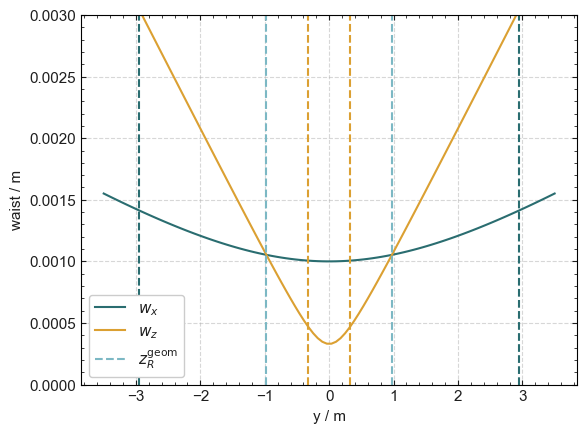

In [66]:
y = np.linspace(-3.5, 3.5, 100)
wx, wz = ely.getWaist(y)
plt.plot(
    y,
    wx,
    label="$w_x$",
)
plt.vlines([ely.zRx, -ely.zRx], 0, 0.003, linestyles="--")
plt.plot(
    y,
    wz,
    label="$w_z$",
)
plt.vlines([ely.zRy, -ely.zRy], 0, 0.003, color="C1", linestyles="--")
plt.ylim(0, 0.003)

plt.vlines(
    [ely.zR, -ely.zR],
    0,
    0.003,
    color="C2",
    linestyles="--",
    label="$z_R^\\text{geom}$",
)
plt.xlabel("y / m")
plt.ylabel("waist / m")

plt.legend()

Text(0, 0.5, 'Electric Field / a.u.')

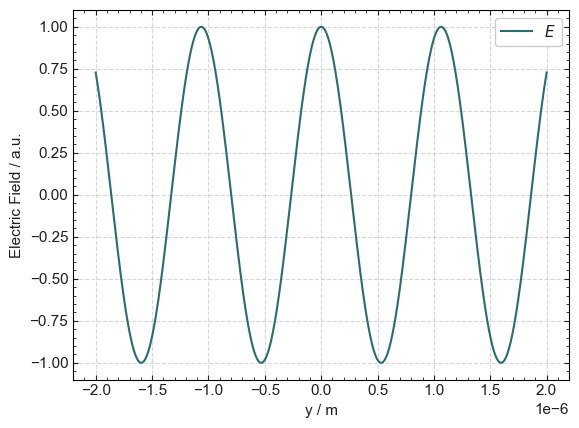

In [67]:
y = np.linspace(-2, 2, 1000) * 1e-6
Y, _ = np.meshgrid(y, 0)

elyfield = ely.getScalarField([0, Y, 0])[0]
plt.plot(y, np.real(elyfield), label="$E$")


plt.legend()
plt.xlabel("y / m")
plt.ylabel("Electric Field / a.u.")

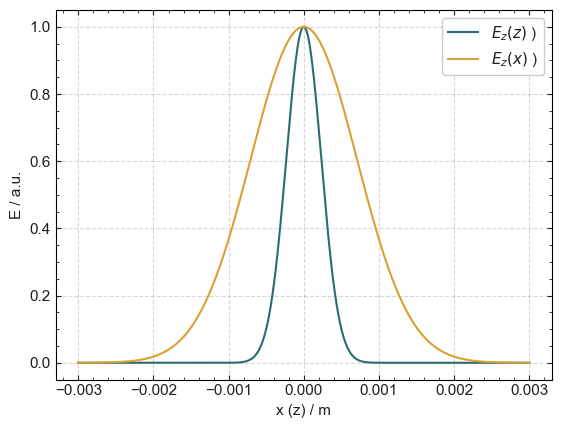

In [68]:
z = np.linspace(-3, 3, 501) * 1e-3
x = np.linspace(-3, 3, 501) * 1e-3

elyfield = ely.getVectorField([0, 0, z])

plt.plot(z, elyfield[2], label="$E_z (z)$ )")


elyfield = ely.getVectorField([z, 0, 0])
plt.plot(z, elyfield[2], label="$E_z (x)$ )")

plt.xlabel("x (z) / m")
plt.ylabel("E / a.u.")

plt.legend()

Text(0, 0.5, 'I')

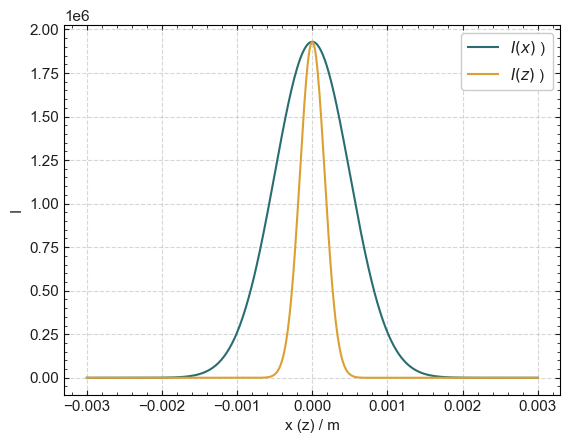

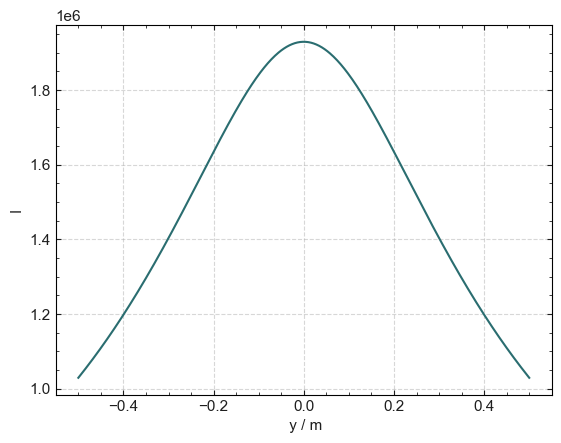

In [69]:
z = np.linspace(-3, 3, 501) * 1e-3
x = np.linspace(-3, 3, 501) * 1e-3

ely_int = ely.getIntensity([x, 0, 0])
plt.plot(z, ely_int, label="$I(x)$ )")


ely_int = ely.getIntensity([0, 0, z])
plt.plot(z, ely_int, label="$I(z)$ )")

plt.xlabel("x (z) / m")
plt.ylabel("I")

plt.legend()

plt.subplots()
y = np.linspace(-0.5, 0.5, 501)
ely_int = ely.getIntensity([0, y, 0])
plt.plot(y, ely_int, label="$I(y)$ )")
plt.xlabel(" y / m")
plt.ylabel("I")

In [70]:
elyfield.shape

(3, 501)

Text(0, 0.5, 'Electric Field / a.u.')

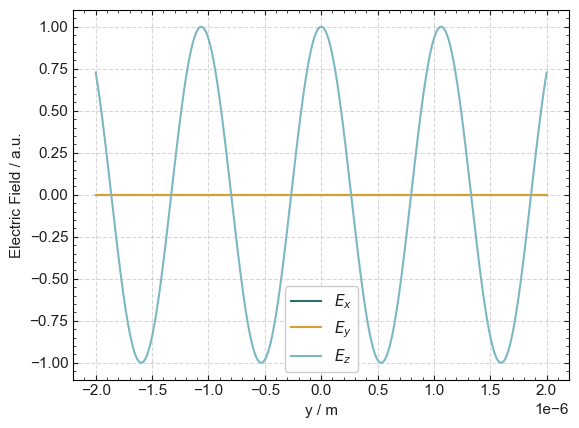

In [71]:
y = np.linspace(-2, 2, 1001) * 1e-6
Y, _ = np.meshgrid(y, y)

elyfield = ely.getVectorField([0, y, 0])
# elyfield = ely.field([0, y, 0])

plt.plot(y, np.real(elyfield[0]), label="$E_x$")
plt.plot(y, np.real(elyfield[1]), label="$E_y$")
plt.plot(y, np.real(elyfield[2]), label="$E_z$")

plt.legend()
plt.xlabel("y / m")
plt.ylabel("Electric Field / a.u.")

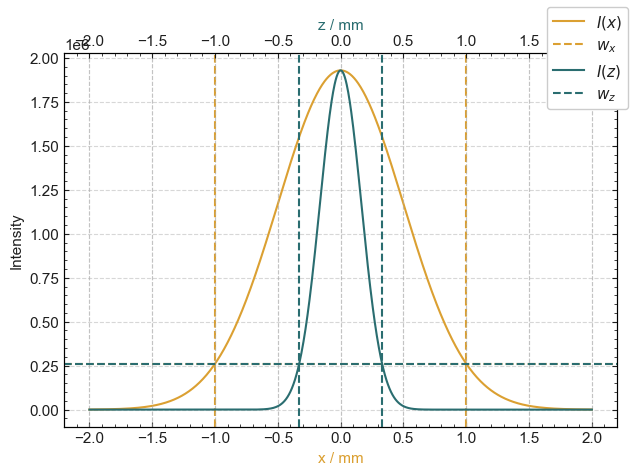

In [72]:
x = np.linspace(-2, 2, 1001) * 1e-3
X, Z = np.meshgrid(x, x)


pos = [x, 0, 0]
elyint = ely.getIntensity(pos)

plt.plot(x / 1e-3, elyint, label="$I(x)$", color="C1")
plt.axhline(elyint.max() / 2.71828**2, linestyle="--", color="C1")
plt.axvline(ely.waistx / 1e-3, linestyle="--", label="$w_x$", color="C1")
plt.axvline(-ely.waistx / 1e-3, linestyle="--", color="C1")

plt.xlabel("x / mm", color="C1")
plt.ylabel("Intensity")


plt.twiny()
plt.xlabel("z / mm", color="C0")

pos = [0, 0, x]
elyint = ely.getIntensity(pos)
plt.plot(x / 1e-3, elyint, label="$I(z)$")
plt.axhline(elyint.max() / 2.71828**2, linestyle="--")
plt.axvline(ely.waisty / 1e-3, linestyle="--", label="$w_z$")
plt.axvline(-ely.waisty / 1e-3, linestyle="--")

plt.gcf().legend()
plt.tight_layout()

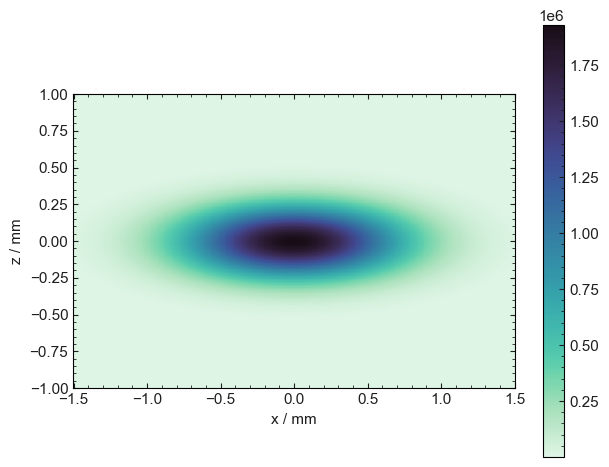

In [73]:
x = np.linspace(-1.5, 1.5, 500) * 1e-3
z = np.linspace(-1, 1, 500) * 1e-3
X, Z = np.meshgrid(x, z)
# elyfield = ely.getVectorField([X, X, 0])
elyint = ely.getIntensity([X, 0, Z])

# plt.pcolor(X, Z, np.real(elyfield[2]))
plt.pcolor(X / 1e-3, Z / 1e-3, elyint)
plt.colorbar()
plt.grid()
plt.xlabel("x / mm")
plt.ylabel("z / mm")
plt.gca().set_aspect("equal")
plt.tight_layout()

### with wasts not aligned with x and z

In [ ]:
ely = EllipticalGaussianBeam(
    # waistx=400e-6,
    waistx=1e-3,
    waisty=0.33e-3,
    polar_dir=[0, 0, 1],
    prop_dir=[0, 1, 0],
    power=1,
    wx_axis=[2 / 3, 0, 1 / 3],
)


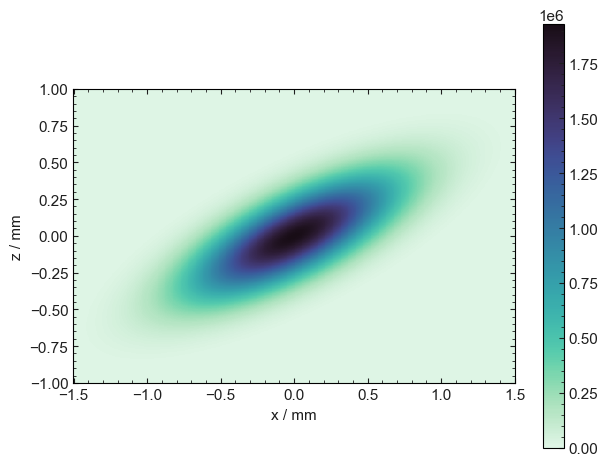

In [ ]:
x = np.linspace(-1.5, 1.5, 500) * 1e-3
z = np.linspace(-1, 1, 500) * 1e-3
X, Z = np.meshgrid(x, z)
# elyfield = ely.getVectorField([X, X, 0])
elyint = ely.getIntensity([X, 0, Z])

# plt.pcolor(X, Z, np.real(elyfield[2]))
plt.pcolor(X / 1e-3, Z / 1e-3, elyint)
plt.colorbar()
plt.grid()
plt.xlabel("x / mm")
plt.ylabel("z / mm")
plt.gca().set_aspect("equal")
plt.tight_layout()


# Appendix: fastest way to compute the intensity

`np.linalg.norm` does a step more the just multiplying the conjugate

In [46]:
x = np.linspace(-300, 300, 100) * 1e-6
y = np.linspace(-250 * 1e-6, 250 * 1e-6)
X, Y = np.meshgrid(x, z)

In [47]:
beam_intentsity = circular_beam.getIntensity([X, Y, 0])
%timeit [np.sqrt((E_field*E_field).sum(axis=0))]

15.4 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [48]:
E_field = circular_beam.field([X, 0, Z])
%timeit [np.linalg.norm(E_field)**2]

ValueError: operands could not be broadcast together with shapes (500,100) (500,500) 

In [ ]:
E_field = circular_beam.field([X, 0, Z])
%timeit [np.sum(np.conj(E_field)*E_field, axis=0)*2*circular_beam.power/pi/circular_beam.waist**2]

In [ ]:
E_field = circular_beam.field([X, 0, Z])
%timeit [(np.conj(E_field)*E_field).sum(axis=0)*2*circular_beam.power/pi/circular_beam.waist**2]

In [ ]:
E_field = circular_beam.field([X, 0, Z])
E_field = np.array(E_field)
%timeit [(np.conj(E_field)*E_field).sum(axis=0)*2*circular_beam.power/pi/circular_beam.waist**2]

The fastest is the following

In [ ]:
E_field = circular_beam.field([X, 0, Z])
E_field = np.array(E_field)
%timeit [(E_field.conj()*E_field).sum(axis=0)*2*circular_beam.power/pi/circular_beam.waist**2]

In [ ]:
lol = (
    (E_field.conj() * E_field).sum(axis=0)
    * 2
    * circular_beam.power
    / pi
    / circular_beam.waist**2
)